In [1]:

import tifffile as tf
import zarr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from scipy.spatial import KDTree
import numpy as np
import pandas as pd
import zarr
from scipy.spatial import KDTree
import tifffile as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import dask.array as da
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance




In [2]:
cluster_df = pd.read_parquet('/Users/swarchol/Research/bed/data/for_simon/for_simon.parquet')

In [3]:
cluster_df

,CellID,Hoechst0,Hoechst1,Hoechst2,anti_CD3,anti_CD45RO,Hoechst3,Keratin_570,aSMA_660,Hoechst4,...,Eccentricity,Solidity,Extent,Orientation,Sample,Condition,Replicate,emb1,emb2,cluster_2d
0,47,15160.563636,46937.436364,42258.036364,0.235838,0.446541,24461.163636,0.270726,0.175902,29225.363636,...,0.921447,0.916667,0.763889,-1.345788,WD-76845-097,CRC,1,8.872235,19.100700,-1
1,49,11740.781250,50723.343750,37632.750000,0.227137,0.584889,20075.703125,0.307917,0.174437,23681.062500,...,0.881066,0.888889,0.653061,-1.338040,WD-76845-097,CRC,1,8.379912,20.137026,48
2,51,9565.513514,35690.567568,27032.162162,0.200757,0.436587,14392.621622,0.223040,0.162788,16623.810811,...,0.745784,0.902439,0.685185,-1.475095,WD-76845-097,CRC,1,8.799885,19.362713,-1
3,52,7308.113636,24641.750000,19214.886364,0.228204,0.662923,9205.522727,0.272994,0.207245,11968.636364,...,0.825548,0.936170,0.571429,-1.390750,WD-76845-097,CRC,1,8.504932,20.219538,48
4,53,19249.623188,57667.202899,53509.811594,0.261224,0.704192,30691.275362,0.295741,0.296045,35399.927536,...,0.842002,0.907895,0.663462,-1.441929,WD-76845-097,CRC,1,8.576233,20.350970,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933248,1242746,18694.276596,18604.936170,17079.659574,0.248739,0.205520,6982.680851,0.136490,0.334573,9554.489362,...,0.618630,0.959184,0.839286,-0.935988,WD-76845-097,CRC,1,18.186203,2.827556,72
933249,1242748,31240.095238,34545.301587,32678.349206,0.361773,0.381520,12513.238095,0.219673,0.126889,17597.158730,...,0.828981,0.940299,0.583333,0.459917,WD-76845-097,CRC,1,11.654654,19.720820,-1
933250,1242751,45004.015873,47513.269841,44139.714286,0.229271,0.467404,16901.253968,0.152905,0.283555,20190.285714,...,0.847186,0.954545,0.630000,0.830085,WD-76845-097,CRC,1,18.262630,3.071928,72
933251,1242753,33568.983607,35640.344262,31911.131148,0.233328,0.515689,12369.524590,0.134693,0.331565,15530.245902,...,0.753467,0.953125,0.693182,-1.363981,WD-76845-097,CRC,1,19.307392,3.061911,72


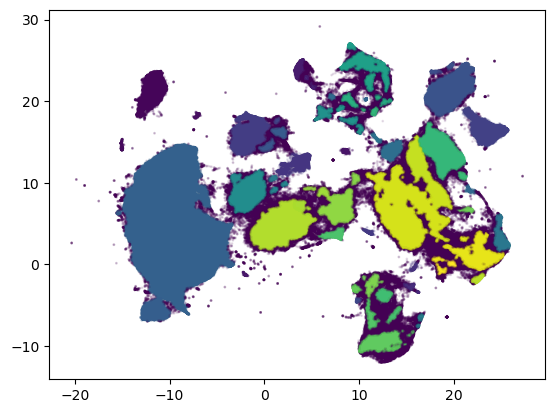

In [4]:
plt.scatter(cluster_df['emb1'], cluster_df['emb2'], c=cluster_df['cluster_2d'], s=1, alpha=0.1)

In [8]:
tf = tf.TiffFile('https://lin-2021-crc-atlas.s3.amazonaws.com/data/WD-76845-097.ome.tif',is_ome=True)
zarr_url = zarr.open('https://lin-2021-crc-atlas.s3.amazonaws.com/data/WD-76845-097.ome.tif')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/swarchol/Research/bed/notebooks/https:/lin-2021-crc-atlas.s3.amazonaws.com/data/WD-76845-097.ome.tif'